# NS6003 Week 10 Optimization Methods and Convergence

In the lecture, we have discussed different learning rules for neural networks. In the learning rules, the central idea is to minimize the loss function of the network for some specific tasks.

In this computing lab, for simplicity, we will try to use the method to minimize a general function.

## Simple Function

To practise the optimization methods, let us begin with the following simple function

$$
f(x) = (\frac{x}{2})^4 - 2 (x-1)^2 - 2 (x+1)^2 - 100e^{-(x/2)^2}
$$

Let us have a look of the function

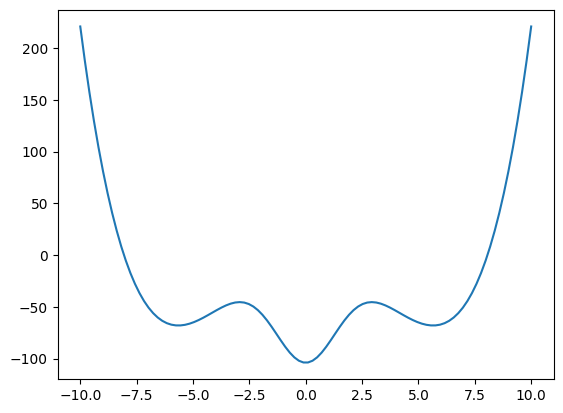

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def func_f(x):
  return (x/2)**4 - 2* (x-1)**2 - 2* (x+1)**2 - 100*np.exp(-(x/2)**2)

xs = np.linspace(-10,10,100)

plt.plot(xs, func_f(xs))

## Gradient Descent

Let us construct a function to perform gradient descent. In which, there is a loop to repeatly perform

$$
x_{t+1} = x_{t} - \eta \frac{df}{dx}(x_t)
$$

The following function implements a numerical gradient descent algorithm that finds  minima of a function without requiring an analytical derivative. Instead of using calculus-based derivatives, **it estimates gradients through finite difference approximation by sampling the function at nearby points and calculating the slope between them**. The algorithm iteratively moves downhill from a starting point using the update rule **x_new = x_old - learning_rate × gradient**, continuing until either the change between iterations falls below a specified tolerance (indicating convergence) or a maximum number of iterations is reached. The function tracks the complete optimization path in a history list, making it useful for visualizing how the algorithm navigates toward the minimum, and it provides clear feedback about whether convergence was achieved within the iteration limit.

In [ ]:
def gradient_descent(starting_point, learning_rate=0.000, max_iterations=1000, tolerance=1e-6):
    """
    Gradient descent algorithm to find local minimum

    Parameters:
    - starting_point: initial x value
    - learning_rate: step size for each iteration
    - max_iterations: maximum number of iterations
    - tolerance: stopping criterion for convergence
    """
    x = starting_point
    history = [x]  # Store history for plotting

    for i in range(max_iterations):
        gradient = (func_f(x+0.005) - func_f(x-0.005))/0.01
        x_new = x - learning_rate * gradient

        # Check for convergence
        if abs(x_new - x) < tolerance:
            print(f"Converged after {i+1} iterations")
            x = x_new
            history.append(x)
            break

        x = x_new
        history.append(x)

    if abs(history[-1] - history[-2]) > tolerance:
      print(f"Not Converged after {max_iterations} iterations")

    return x,  func_f(x), history

This code demonstrates the behavior of gradient descent from multiple starting points by running the optimization algorithm five times with different initial positions (-8, -3, 1, 2, 8) and visualizing the results. It creates a comprehensive plot that shows both the original function curve over the range [-10, 10] and the optimization paths taken from each starting point, with each path rendered in a different color (red, green, orange, black, purple) to distinguish between them.

For each starting point, the code plots the complete trajectory of x-values visited during optimization as connected circles, showing how the algorithm navigates the function landscape, and marks the final converged minimum with a square marker. This visualization effectively illustrates how gradient descent can find different local minima depending on the initial starting position, making it clear that the algorithm's success in finding the global minimum depends heavily on where the search begins, especially for functions with multiple local minima.

Converged after 73 iterations
Converged after 96 iterations
Converged after 26 iterations
Converged after 29 iterations
Converged after 73 iterations


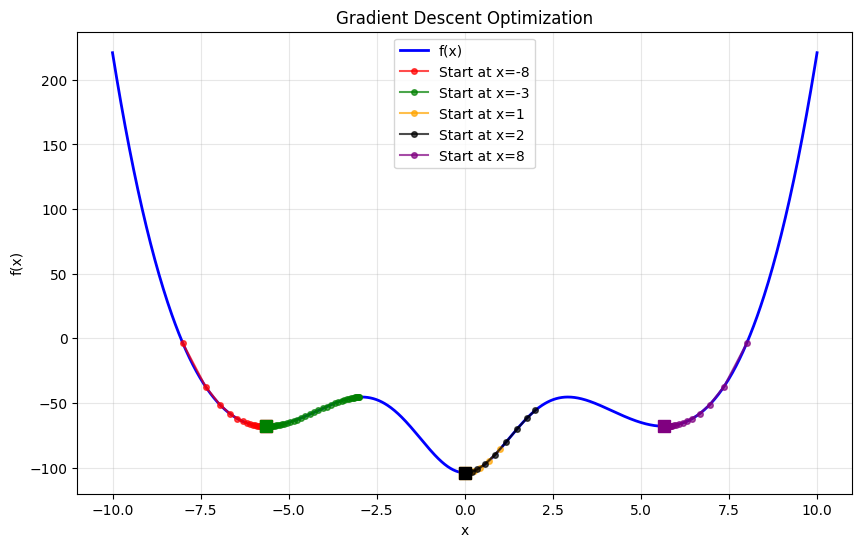

In [ ]:

# Try different starting points to find different minima
starting_points = [-8, -3, 1, 2, 8]

lr = 0.01 # Learning Rate

# Plot the function and gradient descent paths
x_plot = np.linspace(-10, 10, 1000)
y_plot = func_f(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x)')

colors = ['red', 'green', 'orange', 'black', 'purple']
for i, start in enumerate(starting_points):
    x_min, f_min, history = gradient_descent(start, learning_rate=lr)
    history_y = [func_f(x) for x in history]

    plt.plot(history, history_y, 'o-', color=colors[i],
            markersize=4, alpha=0.7, label=f'Start at x={start}')
    plt.plot(x_min, f_min, 's', color=colors[i], markersize=8)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In the above example, the network optimzation was trapped by two local minima. What if we change the learnign rate by modifying variable `lr`.



Not Converged after 1000 iterations
Converged after 14 iterations
Not Converged after 1000 iterations
Not Converged after 1000 iterations
Not Converged after 1000 iterations


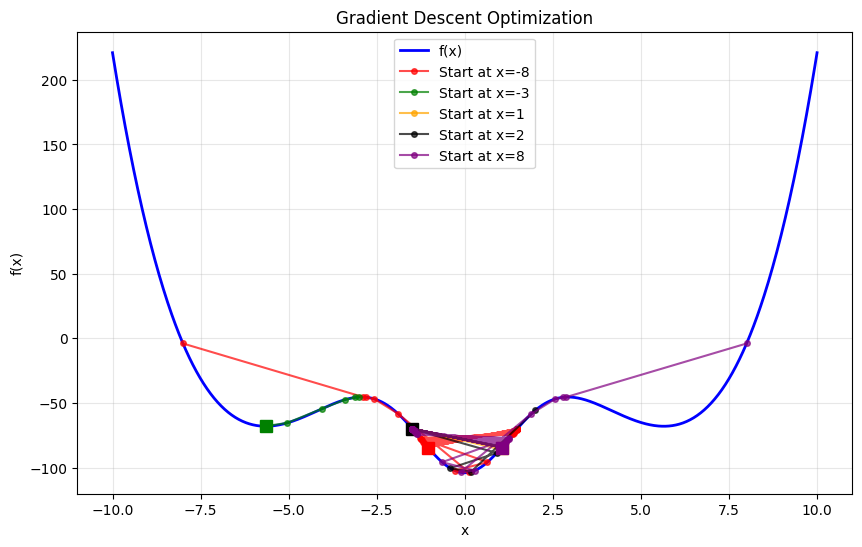

In [ ]:
# Try different starting points to find different minima
starting_points = [-8, -3, 1, 2, 8]

lr = 0.08 # Learning Rate


# Plot the function and gradient descent paths
x_plot = np.linspace(-10, 10, 1000)
y_plot = func_f(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x)')

colors = ['red', 'green', 'orange', 'black', 'purple']
for i, start in enumerate(starting_points):
    x_min, f_min, history = gradient_descent(start, learning_rate=lr)
    history_y = [func_f(x) for x in history]

    plt.plot(history, history_y, 'o-', color=colors[i],
            markersize=4, alpha=0.7, label=f'Start at x={start}')
    plt.plot(x_min, f_min, 's', color=colors[i], markersize=8)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The functional value of $f(x)$ is fluctuating arround the minimum, how does it look like?

Not Converged after 1000 iterations
Converged after 14 iterations
Not Converged after 1000 iterations
Not Converged after 1000 iterations
Not Converged after 1000 iterations


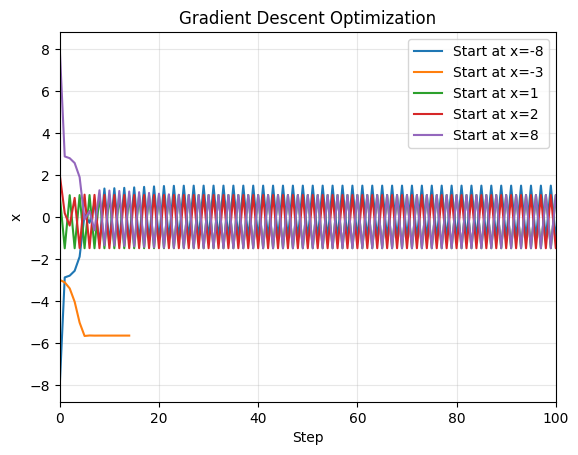

In [ ]:


colors = ['red', 'green', 'orange', 'black', 'purple']
for i, start in enumerate(starting_points):
    x_min, f_min, history = gradient_descent(start, learning_rate=lr)
    history_y = [func_f(x) for x in history]

    plt.plot(history, label=f'Start at x={start}')


plt.xlabel('Step')
plt.ylabel('x')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0,100)
plt.show()

## Gradient Descent with Simulated Annealing

The following function implements a hybrid optimization algorithm that combines gradient descent with simulated annealing by adding controlled random noise to help escape local minima. The core mechanism follows standard gradient descent using numerical differentiation, but incorporates a crucial modification: at each iteration, it adds a random perturbation term ``noise_T * np.random.normal() / (i+1)`` to the position update, where the noise magnitude decreases over time as the iteration count increases.

This decreasing noise schedule mimics the cooling process in simulated annealing, starting with larger random jumps that can help the algorithm escape shallow local minima early in the search, then gradually reducing the randomness to allow fine-tuned convergence to a minimum in later iterations. The noise_T parameter controls the initial strength of the random perturbations, effectively determining how aggressively the algorithm explores the function landscape versus how quickly it settles into a local optimum, making this approach particularly useful for complex functions with multiple local minima where pure gradient descent might get trapped.

In [ ]:
def gradient_descent_sim_ann(starting_point, learning_rate=0.000, max_iterations=1000, noise_T = 0.05, tolerance=1e-6):
    """
    Gradient descent algorithm to find local minimum

    Parameters:
    - starting_point: initial x value
    - learning_rate: step size for each iteration
    - max_iterations: maximum number of iterations
    - tolerance: stopping criterion for convergence
    """
    x = starting_point
    history = [x]  # Store history for plotting

    for i in range(max_iterations):
        gradient = (func_f(x+0.005) - func_f(x-0.005))/0.01
        x_new = x - learning_rate * gradient + noise_T * np.random.normal() / (i+1)

        # Check for convergence
        if abs(x_new - x) < tolerance:
            print(f"Converged after {i+1} iterations")
            x = x_new
            history.append(x)
            break

        x = x_new
        history.append(x)

    if abs(history[-1] - history[-2]) > tolerance:
      print(f"Not Converged after {max_iterations} iterations")

    return x,  func_f(x), history


The following code tests the simulated annealing-enhanced gradient descent algorithm across five different starting points with a higher learning rate (0.05) and significant noise level (``noise_T=5``) to demonstrate the algorithm's ability to escape local minima. The random seed is set to 5 for reproducible results, ensuring consistent behavior across multiple runs. The visualization plots the function curve and overlays the optimization trajectories from each starting point in different colors, with each path showing the more erratic, exploratory behavior characteristic of simulated annealing due to the added random perturbations. Unlike standard gradient descent, these paths may exhibit temporary uphill movements and wider exploration of the function landscape before converging, illustrating how the noise component helps the algorithm potentially find better global minima by avoiding entrapment in shallow local optima.

Not Converged after 1000 iterations
Not Converged after 1000 iterations
Not Converged after 1000 iterations
Not Converged after 1000 iterations
Not Converged after 1000 iterations


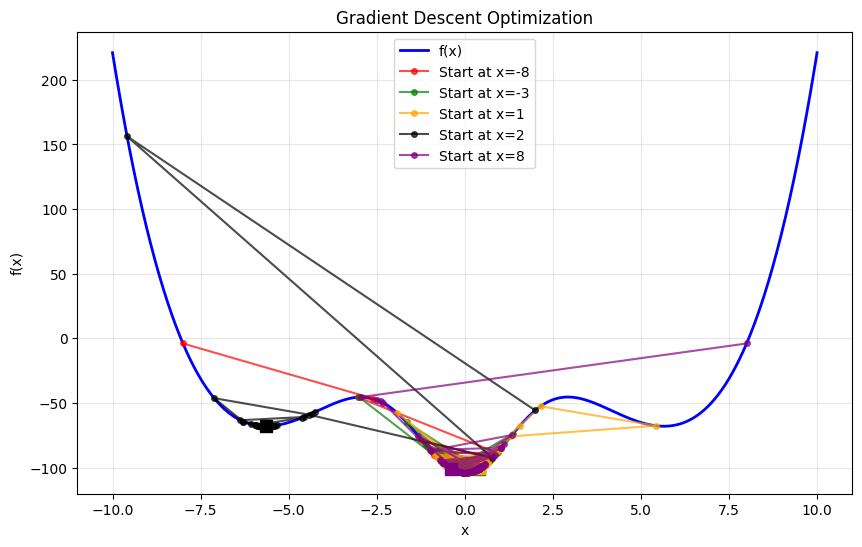

In [ ]:
# Try different starting points to find different minima
starting_points = [-8, -3, 1, 2, 8]

lr = 0.05

np.random.seed(5) # random seed


# Plot the function and gradient descent paths
x_plot = np.linspace(-10, 10, 1000)
y_plot = func_f(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x)')

colors = ['red', 'green', 'orange', 'black', 'purple']
for i, start in enumerate(starting_points):
    x_min, f_min, history = gradient_descent_sim_ann(start, learning_rate=lr, noise_T=5)
    history_y = [func_f(x) for x in history]

    plt.plot(history, history_y, 'o-', color=colors[i],
            markersize=4, alpha=0.7, label=f'Start at x={start}')
    plt.plot(x_min, f_min, 's', color=colors[i], markersize=8)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

To have a clearer picture, we may look at the time coruse of $x$ and $f(x)$.

Not Converged after 1000 iterations
Not Converged after 1000 iterations
Not Converged after 1000 iterations
Not Converged after 1000 iterations
Not Converged after 1000 iterations


Text(0, 0.5, 'f(x)')

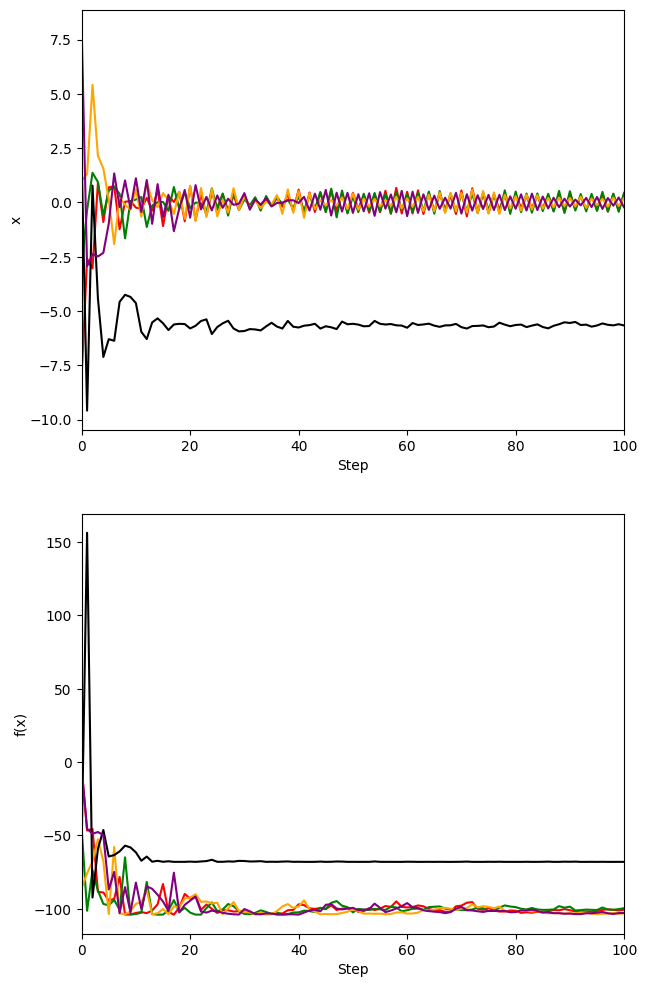

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(7,12))

np.random.seed(5) # random seed

colors = ['red', 'green', 'orange', 'black', 'purple']
for i, start in enumerate(starting_points):
    x_min, f_min, history = gradient_descent_sim_ann(start, learning_rate=lr, noise_T=5)
    history_y = [func_f(x) for x in history]

    axs[0].plot(history, color=colors[i],label=f'Start at x={start}')
    axs[1].plot(history_y, color=colors[i],label=f'Start at x={start}')

for ax in axs:
  ax.set_xlim(0,100)
  ax.set_xlabel('Step')

axs[0].set_ylabel('x')
axs[1].set_ylabel('f(x)')


## Multilayer Perceptron

In the previous example, we explored how optimization algorithms work by minimizing a simple mathematical function. We observed how the optimizer iteratively updates parameters to find the minimum of the objective function, tracking the loss at each step.

Now, let's extend this concept to a more complex scenario: training a Multi-Layer Perceptron (MLP) neural network for classification. While the underlying principles remain the same, the optimization landscape becomes significantly more challenging:

* Complexity: Instead of optimizing a simple 2D function, we're now optimizing hundreds or thousands of neural network weights and biases

* Non-convexity: The loss surface of neural networks contains many local minima, saddle points, and plateaus

* High dimensionality: The parameter space can have thousands of dimensions, making visualization impossible

* Real data: We're working with actual classification data rather than a synthetic mathematical function

Despite this increased complexity, the fundamental optimization process remains identical: we iteratively adjust parameters to minimize a loss function. The Adam optimizer we used for the simple function will now navigate the complex neural network loss landscape, and we can still track its progress by plotting the loss over time.

Let's see how this plays out in practice with a multi-class classification problem:

=== MLP Classification Example ===
Classification Accuracy: 0.9150
Number of iterations: 185
Loss: 0.005917

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        70
           1       0.96      0.93      0.94        73
           2       0.85      0.89      0.87        57

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200



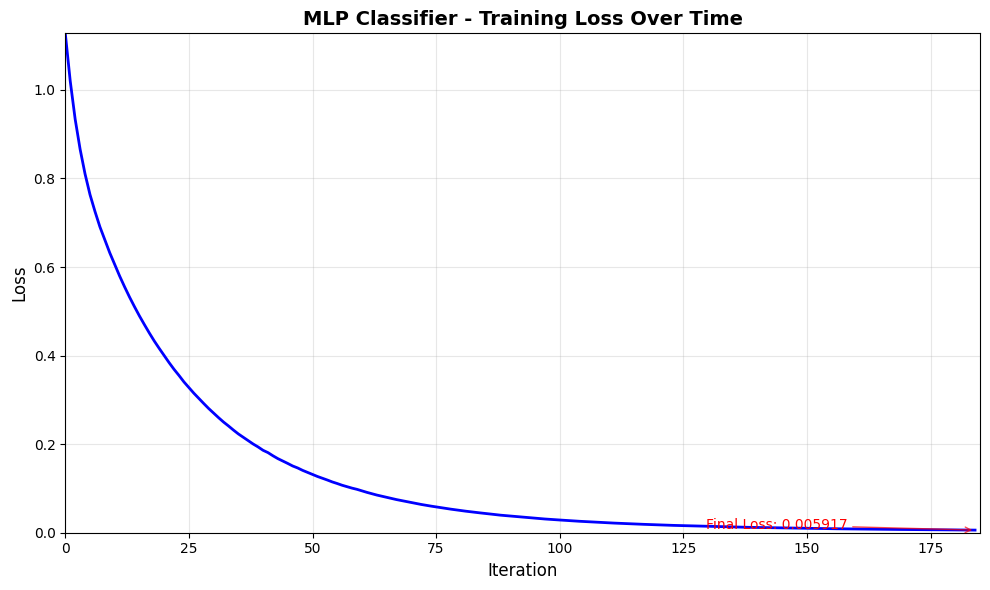


Loss Reduction Analysis:
Initial Loss: 1.127727
Final Loss: 0.005917
Total Loss Reduction: 1.121809
Percentage Reduction: 99.48%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

# Example 1: MLP for Classification
print("=== MLP Classification Example ===")

# Generate sample classification data
X_class, y_class = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=3,
    random_state=42
)

# Split the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Scale the features (important for neural networks)
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

# Create and train MLP classifier
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',             # ReLU activation function
    solver='adam',                 # Adam optimizer
    alpha=0.001,                  # L2 regularization parameter
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

# Train the model
mlp_classifier.fit(X_train_class_scaled, y_train_class)

# Make predictions
y_pred_class = mlp_classifier.predict(X_test_class_scaled)

# Evaluate classification performance
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy:.4f}")
print(f"Number of iterations: {mlp_classifier.n_iter_}")
print(f"Loss: {mlp_classifier.loss_:.6f}")
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))

# Plot the loss time course
plt.figure(figsize=(10, 6))
plt.plot(mlp_classifier.loss_curve_, linewidth=2, color='blue')
plt.title('MLP Classifier - Training Loss Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, len(mlp_classifier.loss_curve_))
plt.ylim(0, max(mlp_classifier.loss_curve_))

# Add some annotations
plt.annotate(f'Final Loss: {mlp_classifier.loss_:.6f}',
             xy=(len(mlp_classifier.loss_curve_)-1, mlp_classifier.loss_curve_[-1]),
             xytext=(len(mlp_classifier.loss_curve_)*0.7, mlp_classifier.loss_curve_[-1]*1.5),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Additional analysis: Show convergence behavior
print(f"\nLoss Reduction Analysis:")
print(f"Initial Loss: {mlp_classifier.loss_curve_[0]:.6f}")
print(f"Final Loss: {mlp_classifier.loss_curve_[-1]:.6f}")
print(f"Total Loss Reduction: {mlp_classifier.loss_curve_[0] - mlp_classifier.loss_curve_[-1]:.6f}")
print(f"Percentage Reduction: {((mlp_classifier.loss_curve_[0] - mlp_classifier.loss_curve_[-1]) / mlp_classifier.loss_curve_[0] * 100):.2f}%")

## Assignment: Impelmenting an Gradient-descent Optimizer with Momentum

Implement a gradient descent optimizer with momentum from scratch using functions and apply it to minimize the simple function ``func_f`` that we explored in class. This assignment will help you understand how momentum improves optimization convergence.

By using the above code for function ``func_f``, modify function ``gradient_descent`` to make it include momentum.

After than, plot
1. the evolution of the optimization
2. time course of the solution $x$, and
3. time course of the functional value $f(x)$

After that, save the file, download this ipynb, and submit it in canvas.